# Predict Soccer Players with Regression

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- Make a model to predict players overall rating based on metrics
- This is a subset of the Kaggle dataset [European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
    - A bigger project is to predict outcomes of games

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data=pd.read_parquet('files/soccer.parquet')

In [3]:
data.head(3)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


### Step 1.c: Data size
- HINT: `len(data)`

In [4]:
len(data), len(data.dropna())

(183978, 180354)

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Inspect the data
- There are many metrics
- To keep it simple let's keep the numeric
    - HINT: find them with `.dtypes`
- You can select all columns of numeric data types as follows `.select_dtypes(include='number')`
    - HINT: assign all the numeric columns to your variable (this is needed for the model, as it does not understand non-numeric features).

In [5]:
data.dtypes

player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

In [6]:
data=data.select_dtypes(include='number')
data.head(2)

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```
- See how many have null values (Assuming `data` contains your data)
```Python
data.isnull().sum()/len(data)*100
```

In [7]:
data.isnull().any()

player_fifa_api_id    False
player_api_id         False
overall_rating         True
potential              True
crossing               True
finishing              True
heading_accuracy       True
short_passing          True
volleys                True
dribbling              True
curve                  True
free_kick_accuracy     True
long_passing           True
ball_control           True
acceleration           True
sprint_speed           True
agility                True
reactions              True
balance                True
shot_power             True
jumping                True
stamina                True
strength               True
long_shots             True
aggression             True
interceptions          True
positioning            True
vision                 True
penalties              True
marking                True
standing_tackle        True
sliding_tackle         True
gk_diving              True
gk_handling            True
gk_kicking             True
gk_positioning      

### Step 2.c: Drop missing data
- Remove rows with missing data
- HINT: `.dropna()`

In [8]:
data=data.dropna()

In [9]:
data.describe()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,...,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000
mean,166543.637602,137244.706794,68.621493,73.471646,55.119036,49.939095,57.253871,62.459885,49.468436,59.230861,...,57.873550,54.935950,46.742576,50.335426,48.001462,14.713629,15.980631,20.629581,16.049083,16.360202
std,53091.892362,137418.500005,7.029845,6.581667,17.251884,19.047599,16.485767,14.186580,18.256618,17.749955,...,15.144086,15.558855,21.231011,21.497298,21.598778,16.864168,15.865238,21.213838,16.097249,17.204948
min,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,156434.000000,35437.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183712.000000,79320.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,200107.000000,192574.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [10]:
data=data.drop(['player_fifa_api_id','player_api_id'],axis=1)

### Step 2.d: Visualize data
- Make a histogram of the `overall_rating`
- This gives you an understanding of the data
- What does it tell you?

<AxesSubplot:>

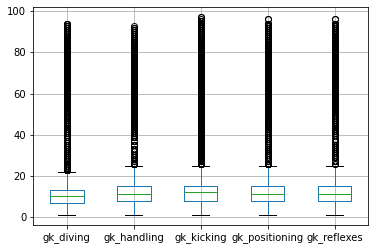

In [11]:
data[['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].boxplot()

In [12]:
cols=['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','overall_rating','potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','vision','penalties','marking','standing_tackle','sliding_tackle']
for col in cols:  
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit= Q1 - 1.5*IQR
    upper_limit= Q3 + 1.5*IQR
    data=data[(data[col]>lower_limit) & (data[col]<upper_limit)]
data.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<AxesSubplot:>

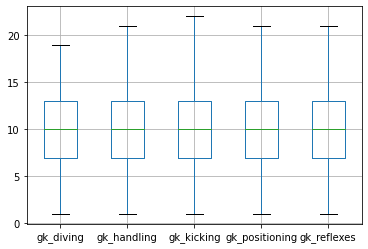

In [13]:
data[['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].boxplot()

In [14]:
data.shape

(131754, 35)

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature and target selection
- The target data is given by `overall_rating`
- As we do not have a description of the date, let's learn a bit about it
    - HINT: Use `data.corr()['overall_rating'].sort_values(ascending=False)`
- For simplicity de-select features you do not thing should be part of the analysis
- Create DataFrames `X` and `y` containing the features and target, respectively.
    - HINT: To get all columns except one use `.drop(['overall_rating', <insert other here>], axis=1)`
    - HINT: Keep `y` as a DataFrame for simplicity later

In [15]:
co=data.corr()['overall_rating'].sort_values(ascending=False)

In [27]:
x=data[['overall_rating']]
y=data.drop(['overall_rating'],axis=1)

### Step 3.b: Divide into test and train
- We do this to test the accuracy of our model
- The idea is: We train on one dataset, then test on another to see how it performs
- To split dataset use
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```
- The `random_state=42` is used for reproducability

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y, x, random_state=42)

### Step 3.c: Train the model
- Create a Linear Regression instance and fit it.
- HINT: Do this on train data (`X_train` and `y_train`)

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
clf=lr.fit(X_train,y_train)

### Step 3.d: Predict on test data
- Here we make predictions
- HINT: Use your model to predict `.predict(X_test)` and assign the result to `y_pred`

In [30]:
clf.predict(X_test)

array([[75.70204425],
       [72.38705141],
       [66.26199063],
       ...,
       [65.66247263],
       [71.00114228],
       [69.44584642]])

### Step 3.e: Evaluate the model
- Apply r-squared on the predicted results and the real results
- HINT: Use `r2_score` on `y_pred` and `y_test`

In [31]:
clf.score(X_test,y_test)

0.8535804823391033

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present finding
- This is more a practice of creating a model
- But feel free to be creative
- An option could be to investigate the best indicator of a player

In [32]:
import statsmodels.formula.api as smf
final=pd.concat([X_train,y_train],axis=1)
final.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
id,,,,,,,,,,,,,,,,,,,,,
102359,65.0,48.0,62.0,60.0,59.0,57.0,55.0,45.0,48.0,41.0,...,57.0,21.0,29.0,26.0,15.0,6.0,6.0,11.0,8.0,63.0
132114,80.0,60.0,60.0,40.0,74.0,55.0,67.0,64.0,72.0,70.0,...,44.0,50.0,55.0,60.0,14.0,14.0,11.0,10.0,13.0,68.0
181503,77.0,61.0,54.0,55.0,73.0,42.0,71.0,67.0,56.0,67.0,...,43.0,59.0,72.0,71.0,15.0,9.0,7.0,15.0,8.0,69.0
54268,74.0,76.0,48.0,60.0,72.0,34.0,74.0,70.0,46.0,72.0,...,54.0,72.0,78.0,76.0,7.0,8.0,13.0,7.0,5.0,74.0
61614,60.0,49.0,51.0,56.0,67.0,41.0,61.0,36.0,38.0,54.0,...,38.0,58.0,61.0,45.0,7.0,8.0,8.0,11.0,9.0,60.0


In [33]:
conclusion_2=smf.ols(formula='overall_rating ~ potential + crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning+gk_reflexes',data=final).fit()
print(conclusion_2.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 1.948e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:25:21   Log-Likelihood:            -2.4505e+05
No. Observations:               98815   AIC:                         4.901e+05
Df Residuals:                   98795   BIC:                         4.903e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7565      0

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

In [34]:
from sklearn.inspection import permutation_importance

In [35]:
perm_imp=permutation_importance(clf,X_train,y_train)
perm_imp.importances_mean

array([ 2.14064443e-01,  6.34860006e-03,  3.38612833e-03,  4.36954586e-02,
        7.07012693e-03,  1.29111531e-03,  1.30702330e-04,  3.22418245e-03,
        1.88188322e-04,  8.37134053e-04,  8.01717537e-02,  9.19948998e-04,
        3.14470544e-04,  7.07316379e-05,  1.71310108e-01,  4.64795312e-04,
        3.39619336e-03,  1.01310129e-03,  8.21275539e-04,  1.91927700e-02,
        4.16885915e-03,  3.50859953e-03,  9.03086289e-03,  5.87248759e-03,
        5.88622620e-05,  2.46680775e-03,  2.11697094e-02,  3.83943317e-03,
        7.92872761e-03,  9.36670267e-06,  2.12190163e-05,  1.88752605e-05,
        4.68087792e-05, -1.68672492e-08])

In [36]:
sort_idx=perm_imp.importances_mean.argsort()
df=pd.DataFrame(perm_imp.importances_mean[sort_idx], X_test.columns[sort_idx])

<AxesSubplot:>

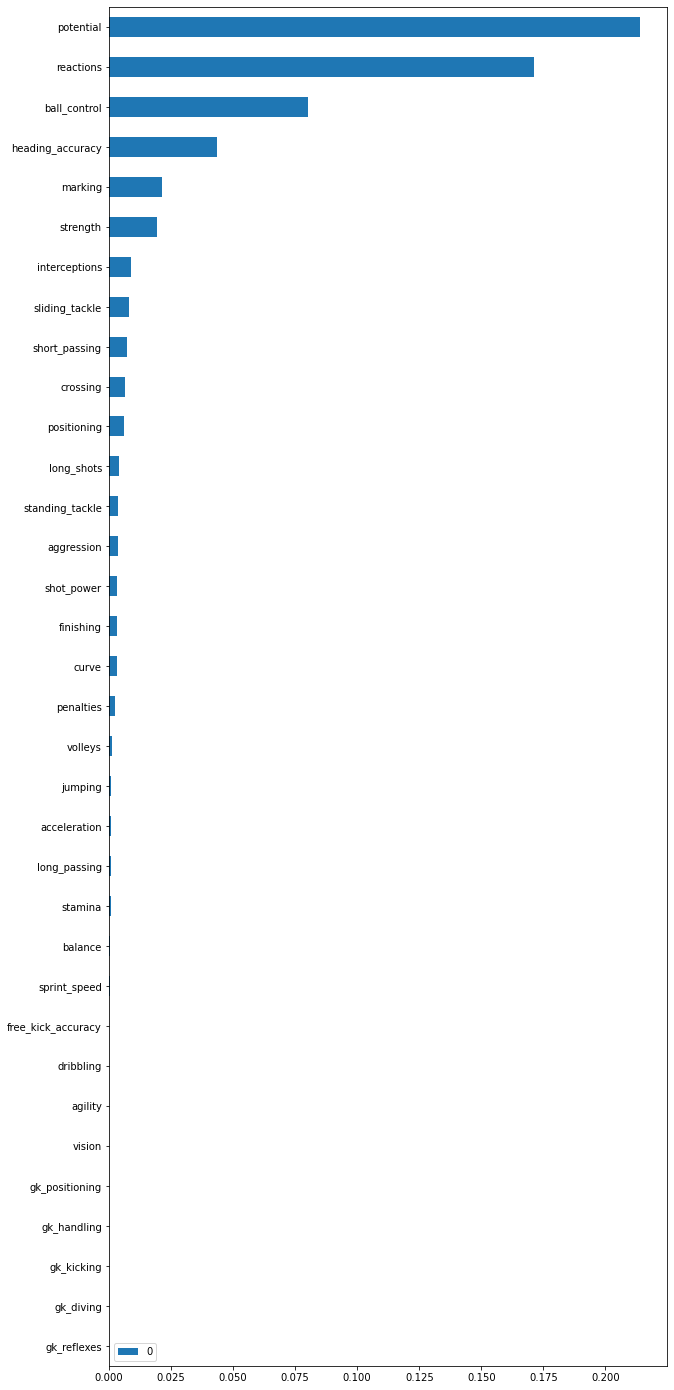

In [44]:
df.plot.barh(figsize=(10,25))